# Regression with Scikit-Learn

In [19]:
# Data path
example_path = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/5_DataMining/data/advertising.csv"

In [2]:
# Read data from a CSV file
import pandas as pd

# Load transactions
advertising = pd.read_csv(example_path).drop(['Unnamed: 0'], axis=1) # remove index in the csv
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## The data file

The dataset contains the amount spent on advertising (in thousands of dollars) for a single product in a given media: __TV__, __Radio__, and __Newspaper__. __Sales__ indicate how many items have been sold (in thousands of items). There are a total of 200 observations (represented by rows). 

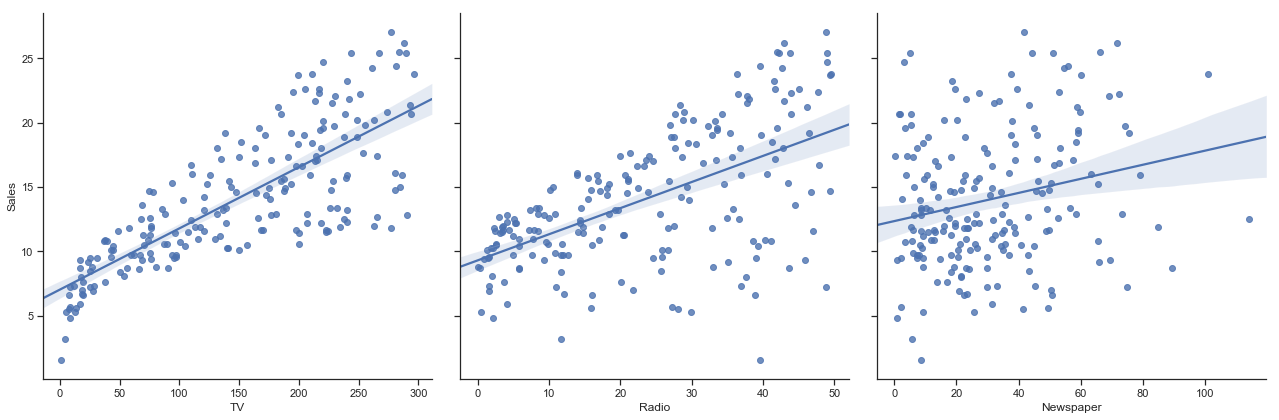

In [3]:
# Let's visualize the relationship between the features and the response using scatterplots
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',  height=6, aspect=1., kind='reg')

Notice we use the `kind='reg'`option from [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to visualize a linear regression for each dataset. 

## Linear regression


$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon $

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)
- $\epsilon$ is the error term

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper + \epsilon$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using a least squares criterion. After fitting, we can used the learned model to make predictions. We will be performing the fit with [`sklearn.linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [4]:
# Select X for regression
X = advertising[['TV', 'Radio', 'Newspaper']]
# Select y for regression
y = advertising['Sales']

Key to succed in any fitting process is to split data into train and test sets. Scikit-learn conveniently provides functionality for spliting arrays or matrices into random train and test subsets [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [5]:
from sklearn.model_selection import train_test_split

# random_state controls the shuffling applied to the data before applying the split.
# It is crucial to pass an int for reproducible output across multiple function calls. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

In [6]:
# Default split is 75% for training and 25% for testing
# You can tune this via test_size & train_size parameters
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


Now, we are finally ready to perform the fit:

In [7]:
# We need to import numpy and scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
# Instantiate the linear regressor
linear_regressor = LinearRegression()

# Fit the model to the training data (learn the coefficients)
fit = linear_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_base.py:547: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


After fitting, we can check the fitting score that returns the coefficient of determination $R^2$ of the prediction:

In [9]:
fit.score(X_train, y_train)

0.890307557755665

And get the parameters of the linear fit:

In [10]:
# Print coefficients and intercept
print(fit.intercept_)
print(fit.coef_)

2.8769666223179335
[0.04656457 0.17915812 0.00345046]


This means the model is defined by: $y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper + \epsilon$

Now that we have the model, we can use it to make prediction on the testing set:

In [11]:
# Predict X_test
y_pred = fit.predict(X_test)
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

Finally, we need a way to measure how good (or bad) the prediction is. Scikit-learn also offers several [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) that would apply in the regression context. For instance, let's compute the __Mean Absolute Error (MAE)__: $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [12]:
# calculate MAE using scikit-learn
from sklearn import metrics
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))

MAE = 1.0668917082595208


Also __Mean Squared Error (MSE)__, that is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [13]:
print("MSE =",metrics.mean_squared_error(y_test, y_pred))

MSE = 1.9730456202283366


Or the __Root Mean Squared Error (RMSE)__:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [14]:
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 1.4046514230328948


Let's plot error per sample using a color-coded scatterplot: 

In [15]:
# Compute sample-wise rmse
test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})
test_pred_df.head()

,y_test,y_pred,RMSE
58,23.8,21.709103,2.090897
40,16.6,16.410552,0.189448
34,9.5,7.609551,1.890449
102,14.8,17.807696,3.007696
184,17.6,18.614636,1.014636


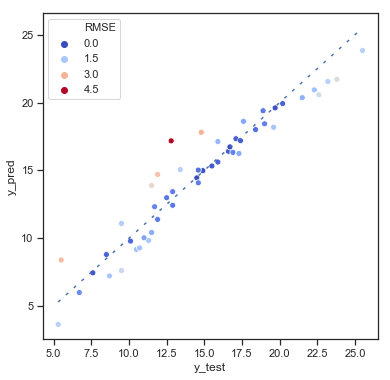

In [16]:
# Plot 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

# Scatter plot y_test vs. y_pred
sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

# y_test = y_pred line. The closer the dots are to this line, the better the prediction
X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])

At this point, it is often very useful to evaluate how much each feature contributes to the quality of the model prediction. Let's fit the exact same data, but removing one __Newspaper__ features:

In [17]:
# Python list of feature names
reduced_features = ['TV', 'Radio']

# Select a subset of the original DataFrame
X_train_reduced = X_train[reduced_features]
y_train_reduced = y_train

X_test_reduced = X_test[reduced_features]
y_test_reduced = y_test

X_train_reduced

,TV,Radio
98,289.7,42.3
123,123.1,34.6
119,19.4,16.0
53,182.6,46.2
33,265.6,20.0
...,...,...
133,219.8,33.5
137,273.7,28.9
72,26.8,33.0
140,73.4,17.0


Finally, we fit a new model with the reduced set of features and compute __RMSE__. Notice that, in this case, removing __Newspaper__ actually improves a bit the performance of the regressor for this dataset:

In [18]:
# Fit the model to the training data (learn the coefficients)
fit_reduced = linear_regressor.fit(X_train_reduced, y_train_reduced)

# Make predictions
y_pred_reduced = fit_reduced.predict(X_test_reduced)

print("RMSE_reduced =",np.sqrt(metrics.mean_squared_error(y_test_reduced, y_pred_reduced)))

RMSE_reduced = 1.3879034699382888
